<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_corte_de_varillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Descripción del problema

**Entrada:** largo de arreglo **n**, arreglo con distintos valores desde **i=1...n**.

**Salida:** Retornó maximo de **rn**, siendo este la suma máxima posible del arreglo, esto es dividiendo el arreglo o no.

Cuando hacemos un algoritmo para encontrar una solución, siempre se quiere encontrar la solución más eficiente de todas, este tipo de problema se llaman problemas de optimización, en este informe se vera la solución para encontrar el mayor precio de un arreglo n, esto lo hará el algoritmo del corte de varillas.

El problema de este problema va a ser la entrada del arreglo, en este caso será n, la posición de venta en que se quiere encontrar el precio máximo

# 2.Corte de varillas

In [1]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

In [4]:
llamadas=0
def corte(arr,n,verbose=False): #versión recursiva
  if(n<=0):
    if(verbose==True):
      print("Arreglo muy pequeño:",0)
    return 0 #caso base
  maxi=-99999999999
  for i in range(0,n):
    global llamadas
    llamadas += 1
    if(verbose==True):
      print("Se comprueba el valor maximo de una varilla de largo",n-i)
      print("-------------------------------------")
    maxi=max(maxi,arr[i]+corte(arr,n-i-1,verbose))
    if(verbose==True):
      print("La mayor ganancia posible es:",maxi)
      print("*************************************")

  return maxi
#ejemplo
A=[2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
print("Arreglo de entrada:",A)
resultado=corte(A,len(A),False)
print("Mayor ganancia posible:",resultado)
print("LLamadas recursivas realizadas:", llamadas)

Arreglo de entrada: [2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
Mayor ganancia posible: 40
LLamadas recursivas realizadas: 1023


In [3]:
subProblemas=0

def corteD(arr,n,verbose=False): #versión dinamica
  r=[0 for x in range(n+1)] #Se crean los arreglos para guardar los resultados y los cortes necesarios para el problema que realizaremos
  cortes = [0 for x in range(n + 1)]
  if(verbose==True):
    print("r[0] =",0)
  r[0]=0

  for i in range(1,n+1):#trabajamos por toda la varilla
    maxi=float("-inf")
    if(verbose==True):
      print("Se evalua una varilla de largo",i)

    for j in range(i):#Se divide la varilla de largo i en dos varillas de largo j y "i-j-1" y se vera cual de estas tiene la mayor ganancia
      global subProblemas
      subProblemas += 1
      if(verbose==True):
        print("Caso",j+1,":La varilla es de largo",j+1)
      if(verbose==True):
        print("La maxima ganancia sera el mayor entre:",maxi,"y",arr[j]+r[i-j-1], "(",arr[j],"(precios largo",j+1,") + ",r[i-j-1],"(Resultado del subproblema",i-j-1, ")")
      maxi=max(maxi,arr[j]+r[i-j-1])
      cortes[i] = j
      if(verbose==True):
        print("Mayor ganancia posible por el momento:",maxi)
        print("-------------------------------------")
    if(verbose==True):
      print("r[",i,"]=",maxi)
      print("*************************************")
    r[i]=maxi#Se guarda la mayor ganancia
  return r[n],cortes

In [5]:
#Ejemplo dinamico
A=[2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
subProblemas=0
print("Arreglo de entrada:",A)
tamano=len(A)
resultado,cortes=corteD(A,tamano)
print("La mayor ganancia posible es:",resultado)
print("Cantidad de sub-problemas resueltos:", subProblemas)
print("Cortes:", cortes[len(A)])

Arreglo de entrada: [2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
La mayor ganancia posible es: 40
Cantidad de sub-problemas resueltos: 55
Cortes: 9


##2.1.Descripción de algoritmo

Ambas versiones de este algoritmo reciben el arreglo **arr** y el tamaño en que se quiere saber el precio máximo **n**

Este algoritmo posee lo que se conoce como una subestructura óptima la cual es la siguiente

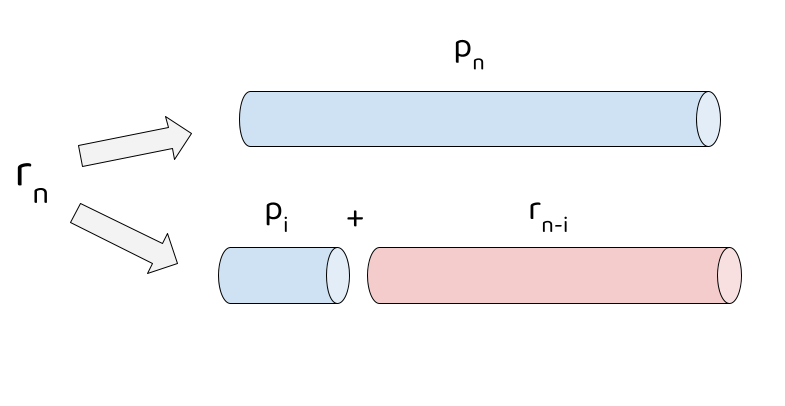

Lo que se puede apreciar de la imagen son los dos casos posibles para un rn, siendo rn el precio máximo de una varilla de largo n, el caso Pn es cuando es la varilla completa, sin haber realizado cortes y el segundo caso es cuando se debe realizar un corte y recurrir al precio máximo de otro caso

Es gracias a esta subestructura optima que se puede construir ambos algoritmos, tanto el recursivo y el dinámico

Ambos algoritmos reciben en la entrada el arreglo **arr** y el precio en la n-ésima posición **n**.

**Versión recursiva:** Esta versión realiza cortes desde 1 hasta **n**, viendo todos los valores máximos **maxi** para cada iteración **i** de manera recursiva, incluso si ya los calculo antes. Una vez realizado la búsqueda por la mayor ganancia por toda la barra y haberlo encontrado, se retorna ese valor


**Version dinamica:** Esta versión crea un arreglo donde va a guardar los resultados **r** luego se va recorriendo desde 1 hasta **n** para ir encontrando todos los resultados de cada medida guardándolos en el arreglo, desde 1 hasta **n** casos posibles utilizando los resultados previos ya realizados, al final vamos a retornar el arreglo **r** en la posición **n**

Como salida de los dos algoritmos vamos a tener el resultado de la ganancia máxima posible del largo **n**

##2.2.Ejemplo versión dinámica

Tomemos el siguiente arreglo:

A=[1,3,5,7,16,16,23]

Busquemos el mayor precio para una varilla de largo tres

Primero se crea el arreglo **r** del mismo tamaño que nuestro arreglo original y lo llenamos de 0

r=[0,0,0,0,0,0,0]

en la primera posición vamos a mantener el 0

Se ve el primer caso, varilla de largo 1

Una varilla de largo 1 tiene como única opción la vara completa, por lo tanto la mayor ganancia de nuestra varilla de largo 1 es:

r=[0,1,0,0,0,0,0]

Ahora veremos una varilla de largo 2

Existen dos casos:

1)Dividir la varilla en dos partes de largo 1, esto nos dará como resultado 2

2)No realizar divisiones, entregándonos un valor de 3

La mayor ganancia posible para una varilla de largo 2 es de valor 3

r=[0,1,3,0,0,0,0]

Veremos una varilla de largo 3

Existen tres casos posibles:

1)Tres divisiones de largo 1, entregandonos un total de 3

2)Dos divisiones, una de largo 1 y otra de 2,entregandonos un resultado de 4

3)Ninguna división, entregándonos un resultado de 5

La máxima ganancia posible para una varilla de largo 3 es el valor 5

Como ya llegamos a la varilla de largo 3, aquí se acaba nuestro código, retornando la ganancia máxima posible la cual será 5

##2.3.Ejecución verbose algoritmo recursivo

In [6]:
llamadas=0
A=[2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
print("Arreglo de entrada:",A)
resultado=corte(A,3,True)
print("Mayor ganancia posible:",resultado)
print("LLamadas recursivas realizadas:", llamadas)

Arreglo de entrada: [2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
Se comprueba el valor maximo de una varilla de largo 3
-------------------------------------
Se comprueba el valor maximo de una varilla de largo 2
-------------------------------------
Se comprueba el valor maximo de una varilla de largo 1
-------------------------------------
Arreglo muy pequeño: 0
La mayor ganancia posible es: 2
*************************************
La mayor ganancia posible es: 4
*************************************
Se comprueba el valor maximo de una varilla de largo 1
-------------------------------------
Arreglo muy pequeño: 0
La mayor ganancia posible es: 8
*************************************
La mayor ganancia posible es: 10
*************************************
Se comprueba el valor maximo de una varilla de largo 2
-------------------------------------
Se comprueba el valor maximo de una varilla de largo 1
-------------------------------------
Arreglo muy pequeño: 0
La mayor ganancia posible es: 2
***

##2.4.Ejecución verbose algoritmo dinámico

In [7]:
llamadas=0
A=[2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
print("Arreglo de entrada:",A)
resultado,cortes=corteD(A,3,True)
print("Mayor ganancia posible:",resultado)
print("LLamadas recursivas realizadas:", llamadas)

Arreglo de entrada: [2, 8, 9, 9, 10, 10, 13, 23, 26, 33]
r[0] = 0
Se evalua una varilla de largo 1
Caso 1 :La varilla es de largo 1
La maxima ganancia sera el mayor entre: -inf y 2 ( 2 (precios largo 1 ) +  0 (Resultado del subproblema 0 )
Mayor ganancia posible por el momento: 2
-------------------------------------
r[ 1 ]= 2
*************************************
Se evalua una varilla de largo 2
Caso 1 :La varilla es de largo 1
La maxima ganancia sera el mayor entre: -inf y 4 ( 2 (precios largo 1 ) +  2 (Resultado del subproblema 1 )
Mayor ganancia posible por el momento: 4
-------------------------------------
Caso 2 :La varilla es de largo 2
La maxima ganancia sera el mayor entre: 4 y 8 ( 8 (precios largo 2 ) +  0 (Resultado del subproblema 0 )
Mayor ganancia posible por el momento: 8
-------------------------------------
r[ 2 ]= 8
*************************************
Se evalua una varilla de largo 3
Caso 1 :La varilla es de largo 1
La maxima ganancia sera el mayor entre: -inf y 10

#3.Correctitud

**Teorema (correctitud)**

El algoritmo corteD recibe un arreglo **arr** y un largo **n**, este algoritmo retorna correctamente el mayor precio posible de la varilla de largo **n**

**Prueba del teorema**

Para probar este teorema se utilizara inducción matematica

**Caso base:**

Durante el caso base n=0, ya se encuentra el mayor precio posible del subproblema ya que este es siempre el mismo valor. 

**Caso inductivo:**

Vamos a tener **r(n)=max(p(i)+r(n-i),p(n))**, aquí pueden haber dos casos

**Primer caso:** Cuando es mayor **p(i)+r(n-i)**, el subproblema **r(n-i)** ya fue resuelto en anteriores iteraciones y este retorna el precio máximo

**Segundo caso:** Cuando **p(n)** es mayor, retorna el máximo precio correspondiente, el cual es en este caso la varilla completa de largo **n**

#4.Tiempo de ejecución


Definamos una función matemática que describa la cantidad de subproblemas que deben ser resueltos en la función de tamaño n, esta es la siguiente:

$T(n)=\sum\limits_{i=1}^{n+1}\sum\limits_{j=0}^{i}c$

Se pueden notar dos sumatorias, las dos corresponden al largo de la varilla desde 1 hasta n y los subproblemas de la varilla, en estos se calculan las ganancias máximas

$T(n)=c\sum\limits_{i=1}^{n+1}j$

$T(n)=c*n(n+1)/2$

Una vez resuelta la sumatoria, vamos a tener:

$T(n) = O(n^2)$

Gracias a esta función, podemos encontrar el tiempo de ejecución de cada subproblemas el cual es O(n)

Finalmente vamos a tener como tiempo de ejecución del algoritmo corte de varillas dinámico gracias a las dos sumatorias, en total nos va a dar O(n^2)

**Complejidad Espacial**

El algoritmo corte de varillas tiene una complejidad espacial de $O(n)$. Esto se debe a que este algoritmo utiliza un arreglo de largo $n$ (largo de la varilla) en el que va almacenando la ganancia máxima de venta de cada largo de la varilla desde 1 hasta $n + 1$.

#5.Experimentos

A continuación se van a presentar los distintos experimentos realizados 

##5.1.Versión recursiva contra la dinámica

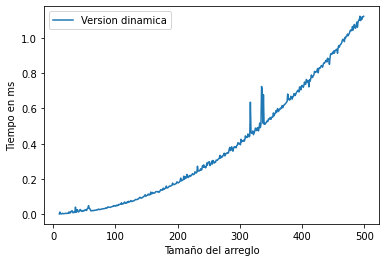

In [9]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]

for n in range(10,500):

  a = random.sample(range(1, 1000), n)
  t = repeat(setup="from __main__ import corteD", stmt=f"corteD({a}, {len(a)})", repeat=1, number=20)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["Version dinamica"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

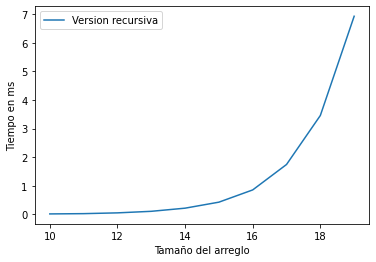

In [10]:
z=[]; w=[]

for n in range(10,20):
  a = random.sample(range(1, 1000), n)
  t2 = repeat(setup="from __main__ import corte", stmt=f"corte({a}, {len(a)})", repeat=1, number=20)
  z.append(n)
  w.append(t2)

plt.plot(z,w)
plt.legend(["Version recursiva"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis del problema**

Como se puede notar en ambos gráficos, la versión dinámica es mucho más eficiente ya que realiza una mayor cantidad de problemas en un menor tiempo a la cantidad de problemas que debe resolver la versión recursiva. La razón de esta diferencia es que el tiempo de ejecución de la versión recursiva es O(2^n) y la dinámica es O(n^2), la versión recursiva crece considerablemente mayor

##5.3.Cantidad de subproblemas hechos por la versión dinámica

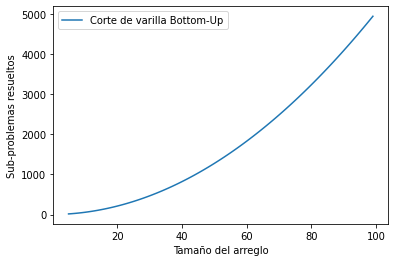

In [12]:
x=[n for n in range(5,100)] 
y=[]; 

for n in range(5,100):
  a = cutrod_instance_generator(n)

  subProblemas = 0
  corteD(a,len(a))
  y.append(subProblemas)

plt.plot(x,y)
plt.legend(["Corte de varilla Bottom-Up"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Sub-problemas resueltos')
plt.show()

**Análisis de los resultados**

Se puede apreciar un crecimiento a la medida que más largo es el arreglo, esto tiene sentido debido a que el análisis previo que hicimos el tiempo de ejecución esta hecho de dos sumatorias, una de estas equivale a la cantidad de subProblemas, esta sumatoria nos da O((n^2)/2), esto se da a que solo nos interesa una sumatoria de la doble sumatoria